In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [11]:
df = pd.read_csv('mainframes/sov_null_2_nonevents.csv')

In [12]:
df = df.rename(columns={'security':'system.security'})

In [13]:
df.columns

Index(['killmail_id', 'killmail_hash', 'killmail_time',
       'attackers.character_id', 'attackers.corporation_id',
       'attackers.alliance_id', 'attackers.faction_id',
       'attackers.damage_done', 'attackers.final_blow',
       'attackers.security_status', 'attackers.ship_type_id',
       'attackers.weapon_type_id', 'victim.character_id',
       'victim.corporation_id', 'victim.alliance_id', 'victim.faction_id',
       'victim.damage_taken', 'victim.ship_type_id', 'solar_system_id',
       'war_id', 'regionID', 'constellationID', 'solarSystemID',
       'solarSystemName', 'system.security', 'factionID', 'regionName',
       'constellationName', 'factionName'],
      dtype='object')

In [14]:
conditions = [(df['system.security']>0.4),
                (df['system.security']>0.0)&(df['system.security']<0.5),
                (df['system.security']<0.1)]
categories = ['High security space', 'Low security space', 'Null security space']
df['high_low_null'] = np.select(conditions, categories)

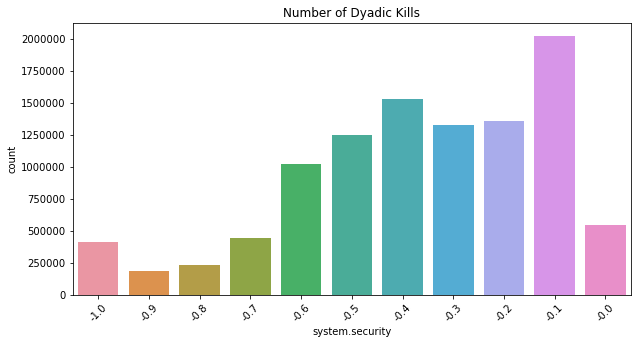

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='system.security', data=df, ax=ax)
plt.xticks(rotation=45)
ax.set_title('Number of Dyadic Kills')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


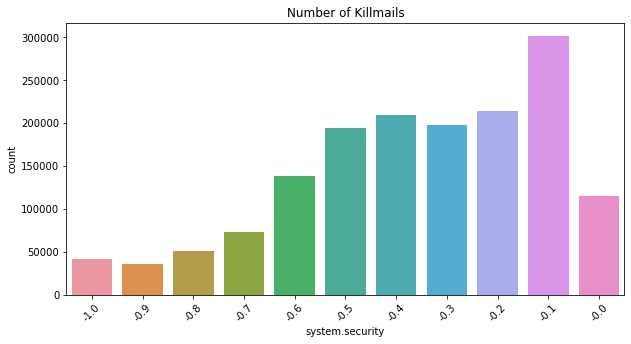

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='system.security', data=df.drop_duplicates("killmail_id"), ax=ax)
plt.xticks(rotation=45)
ax.set_title('Number of Killmails')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


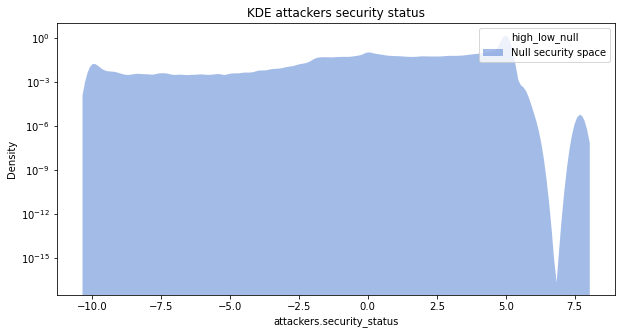

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(x='attackers.security_status', multiple='layer', hue='high_low_null', alpha=0.5, data=df, ax=ax, palette='muted', linewidth=0, fill=True, log_scale=[False,True])
ax.set_title("KDE attackers security status")
plt.show()

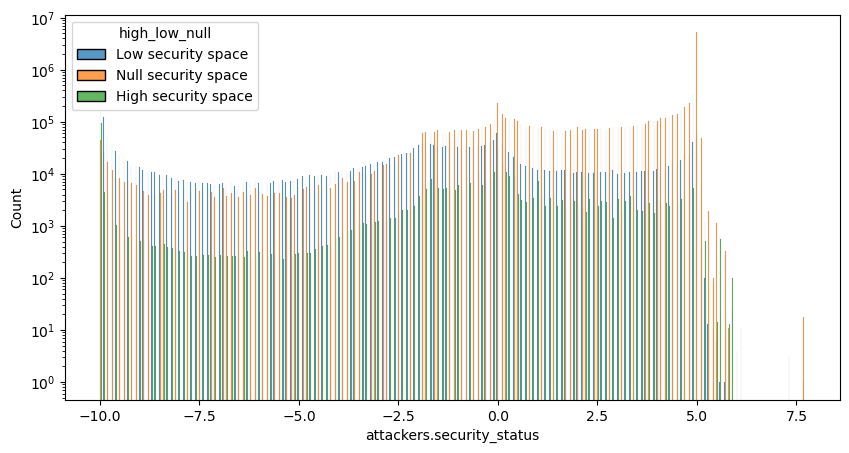

In [58]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x="attackers.security_status", kde=False, hue='high_low_null', multiple='dodge', ax=ax, log_scale=[False,True])
plt.show()

In [15]:
len(df['killmail_id'].unique())

3435312

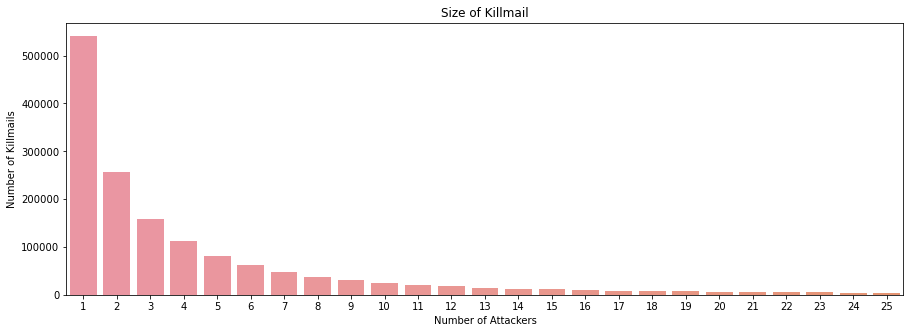

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x=df['killmail_id'].value_counts().values, ax=ax)
ax.set_xlim(-0.5,24.5)
ax.set_xlabel('Number of Attackers')
ax.set_ylabel('Number of Killmails')
ax.set_title('Size of Killmail')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

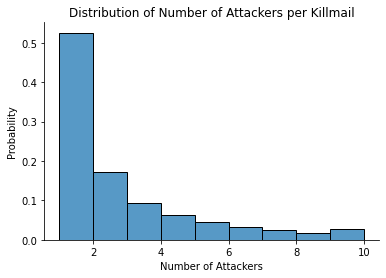

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# assuming the dataframe is called "killmail_data"
num_attackers = df.groupby(['killmail_id'])['attackers.character_id'].count().reset_index()
num_attackers.columns = ['killmail_id', 'num_attackers']

sns.histplot(data=num_attackers, x='num_attackers', bins=range(1, 11), stat='probability')
sns.despine()
plt.xlabel('Number of Attackers')
plt.ylabel('Probability')
plt.title('Distribution of Number of Attackers per Killmail')
plt.show()

<AxesSubplot: xlabel='attackers.security_status', ylabel='attackers.damage_done'>

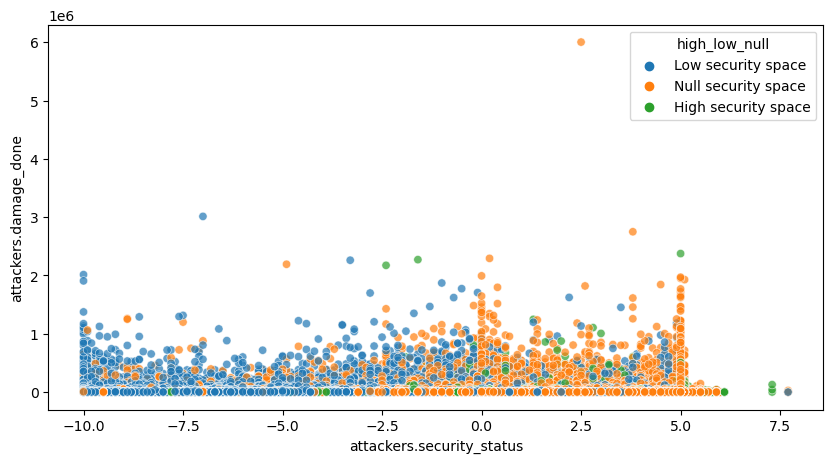

In [56]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='attackers.security_status', y='attackers.damage_done', alpha=0.7, hue='high_low_null', data=df, ax=ax)

Text(0.5, 1.0, 'sec.status vs damage.done')

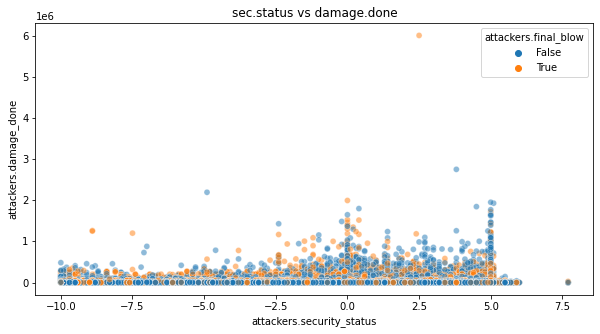

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='attackers.security_status', y='attackers.damage_done', alpha=0.5, hue='attackers.final_blow', data=df, ax=ax)
ax.set_title('sec.status vs damage.done')

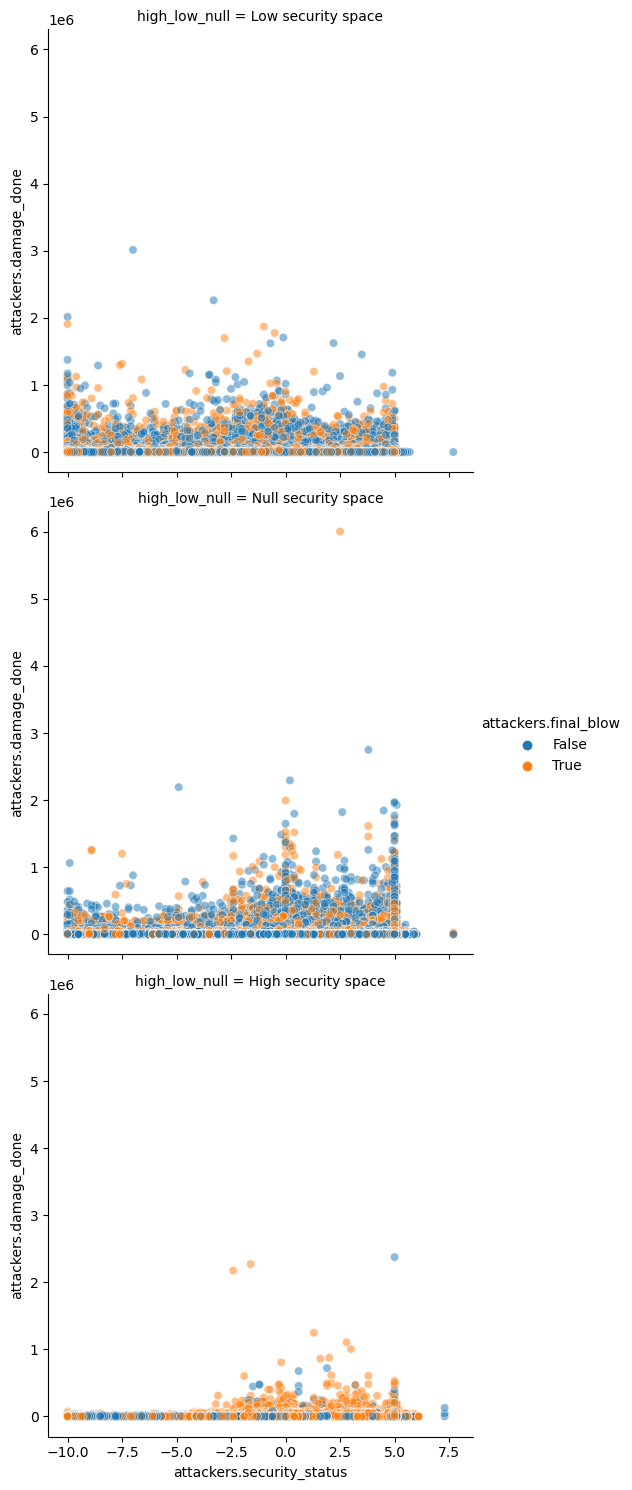

In [63]:
sns.relplot(
    data=df, y="attackers.damage_done", x="attackers.security_status",
    row="high_low_null", hue="attackers.final_blow",
    kind="scatter", markers='x', alpha=0.5
)

In [21]:
df = pd.read_csv('eventnet/highsec_space_KILLS_30_halflife.csv')

In [22]:
df = df[df['IS_OBSERVED']==1]

In [4]:
df.columns

Index(['IS_OBSERVED', 'SOURCE', 'TARGET', 'TIME', 'TYPE', 'WEIGHT',
       'EVENT_INTERVAL_ID', 'EVENT', 'INTEGER_TIME', 'TIME_POINT', 'TIME_UNIT',
       'EVENT_INTERVAL', 'num.attackers',
       'attacker.victim.frac.diff.corporation',
       'attacker.pair.frac.diff.corporation', 'repetition',
       'undirected.repetition', 'a.sub.rep.1', 'a.sub.rep.2', 'a.sub.rep.3',
       'a.sub.rep.4', 'a.sub.rep.5', 'a.sub.rep.6', 'a.sub.rep.7',
       'a.sub.rep.8', 'a.sub.rep.9', 'a.sub.rep.10', 'v.a.sub.rep.0',
       'v.a.sub.rep.1', 'v.a.sub.rep.2', 'v.a.sub.rep.3', 'v.a.sub.rep.4',
       'v.a.sub.rep.5', 'v.a.sub.rep.6', 'v.a.sub.rep.7', 'v.a.sub.rep.8',
       'v.a.sub.rep.9', 'v.a.sub.rep.10', 'reciprocation', 'attacker.indeg',
       'victim.outdeg', 'interact.attackers.1', 'interact.attackers.2',
       'interact.attackers.3', 'interact.attackers.4', 'interact.attackers.5',
       'interact.attackers.6', 'interact.attackers.7', 'interact.attackers.8',
       'interact.attackers.9', 

In [26]:
struct = df[['attack.friend.of.friend', 'attack.friend.of.enemy',
       'attack.enemy.of.friend', 'attack.enemy.of.enemy',
       'collab.friend.of.friend', 'collab.friend.of.enemy',
       'collab.enemy.of.friend', 'collab.enemy.of.enemy']]

In [27]:
struct=(struct-struct.min())/(struct.max()-struct.min())

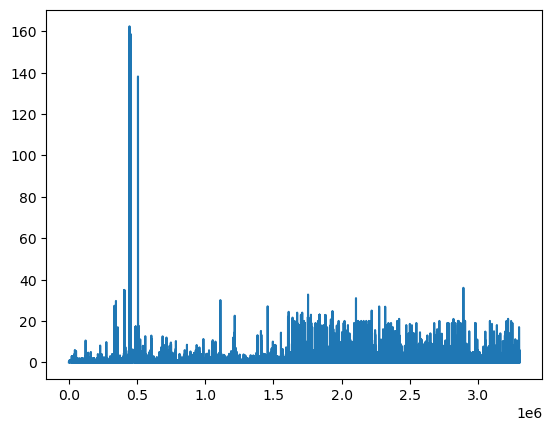

In [38]:
plt.plot(df['reciprocation'])

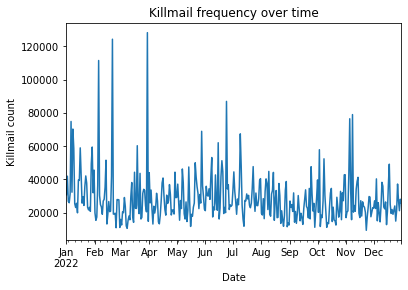

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the killmail data into a DataFrame
killmails = pd.read_csv('mainframes/sov_null_2_nonevents.csv')

# Convert the 'killmail_time' column to datetime
killmails['killmail_time'] = pd.to_datetime(killmails['killmail_time'])

# Group the killmails by day and count the number of killmails in each day
daily_kills = killmails.groupby(pd.Grouper(key='killmail_time', freq='D')).size()

# Create a line plot of the daily killmails
daily_kills.plot(kind='line')

# Set the title and axis labels
plt.title('Killmail frequency over time')
plt.xlabel('Date')
plt.ylabel('Killmail count')

# Show the plot
plt.show()


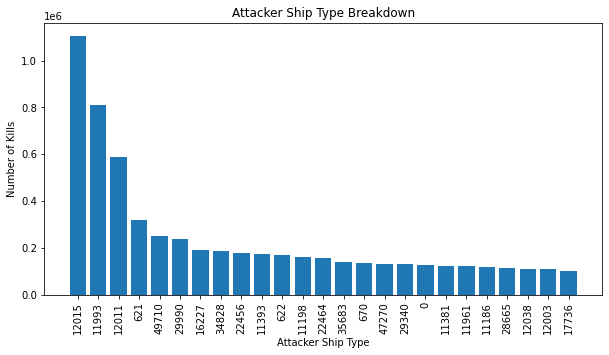

In [10]:
ship_counts = killmails.groupby('attackers.ship_type_id')['killmail_id'].count().reset_index()
ship_counts = ship_counts.sort_values('killmail_id', ascending=False).head(25)
ship_counts['attackers.ship_type_id'] = ship_counts['attackers.ship_type_id'].astype('string')
plt.figure(figsize=(10, 5))
plt.bar((ship_counts['attackers.ship_type_id']), ship_counts['killmail_id'])
plt.xticks(rotation=90)
plt.xlabel('Attacker Ship Type')
plt.ylabel('Number of Kills')
plt.title('Attacker Ship Type Breakdown')
plt.show()


In [2]:
df = pd.read_csv('mainframes/sov_null_2_nonevents.csv')

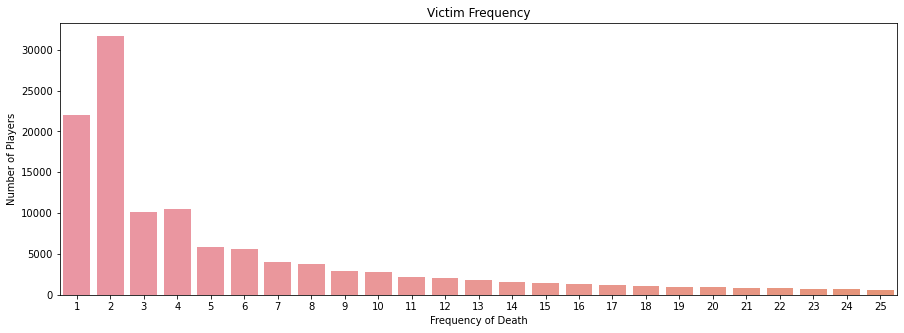

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x=df.drop_duplicates(['killmail_id'])['victim.character_id'].value_counts().values, ax=ax)
ax.set_xlim(-0.5,24.5)
ax.set_xlabel('Frequency of Death')
ax.set_ylabel('Number of Players')
ax.set_title('Victim Frequency')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

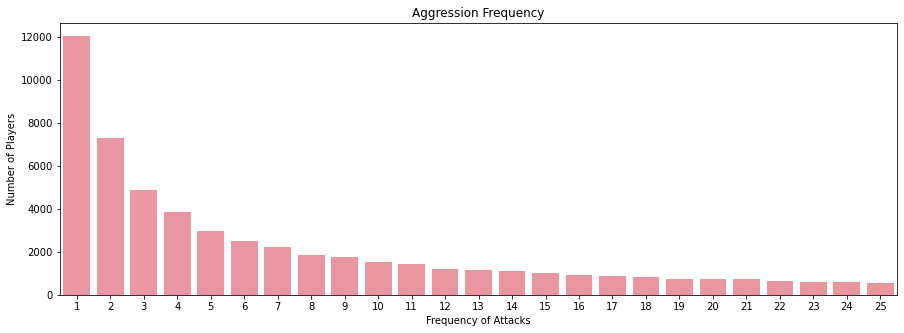

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x=df['attackers.character_id'].value_counts().values, ax=ax)
ax.set_xlim(-0.5,24.5)
ax.set_xlabel('Frequency of Attacks')
ax.set_ylabel('Number of Players')
ax.set_title('Aggression Frequency')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [37]:
len(df['attackers.character_id'].unique())

155743

In [38]:
len(df['victim.character_id'].unique())

335016